# Лабораторна робота 7

## Завдання 1

Діедральна група $D_{20}$ має ряд нормальних підгруп: 

In [4]:
G = DihedralGroup(20)
[N.order() for N in G.normal_subgroups()]

[40, 20, 20, 20, 10, 4, 2, 5, 1]

Для кожної нормальної підгрупи $N$ побудуйте ендоморфізм $\phi : D_{20} \rightarrow D_{20}$ такий, що $Ker \phi = N$. Задайте його через `PermutationGroupMorphism` і використайте метод `.kernel` як підтвердження. 

___Зауваження___: ядро має бути не __ізоморфне__ підгрупі, а __рівне__ їй.

## Завдання 2

Знайдіть центр та представників класів спряженості для груп $C_{11}, D_{13}, Q_{8}, SL(3, \mathbb{Z}_7)$. Виведіть кількість елементів в кожній групі, кількість класів спряженості та запишіть формулу для них. 

In [5]:
C11 = CyclicPermutationGroup(11)
D13 = DihedralGroup(13)
Q8 = QuaternionGroup()
SL3Z7 = SL(3, Integers(7))
groups = [C11, D13, Q8, SL3Z7]
output_file = "t2.txt"

with open(output_file, "w") as t2:
    for G in groups:
        t2.write(f"Група: {G}\n")
        order = G.order()
        t2.write(f"  Кількість елементів групи: {order}\n")
        center = G.center()
        t2.write(f"  Центр (порядок {center.order()}): {center}\n")
        conjugacy_classes = G.conjugacy_classes_representatives()
        num_classes = len(conjugacy_classes)
        t2.write(f"  Кількість класів спряженості: {num_classes}\n")
        t2.write(f"  Представники класів спряженості:\n")
        for rep in conjugacy_classes:
            t2.write(f"    {rep}\n")
        sizes = [G.order()/G.centralizer(g).order() for g in conjugacy_classes]
        t2.write(f"  Формула класу: {sizes}\n")
        t2.write(f"  Перевірка: {order == sum(sizes)}\n\n")

print(f"Успішне збереження даних в файл '{output_file}'")

Успішне збереження даних в файл 't2.txt'


## Завдання 3

1. Побудуйте граф гіперкуба $C_4$ і знайдіть його групу автоморфізмів. Розгляньте цю групу і її дію на граф. Покажіть орбіти цієї групової дії та зробіть висновки. 
2. Знайдіть стабілізатор довільної вершини та розгляньте його як групу з дією на весь граф. Знайдіть орбіти цієї нової групової дії. Зробіть висновки в термінах гіперкуба.

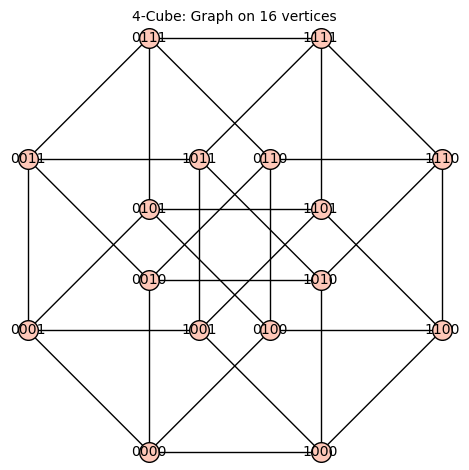

In [6]:
G = graphs.CubeGraph(4)
G

In [7]:
Aut = G.automorphism_group()
Aut.structure_description()

'((((C2 x C2 x C2) : (C2 x C2)) : C3) : C2) : C2'

In [8]:
orbits = Aut.orbits()
print("Орбіти групової дії на вершинах графа:")
for orbit in orbits:
    print(orbit)

Орбіти групової дії на вершинах графа:
('0000', '0001', '0010', '0100', '0011', '1000', '0101', '1001', '0110', '1010', '0111', '1100', '1011', '1101', '1110', '1111')


In [9]:
# Висновок: Група гіперкуба С4 є симетричною. Усі вершини належать одній орбіті, відповідно група автоморфізмів для графа діє транзитивно 
# на всіх його вершинах.
# За рахунок симетрії, кожна вершина графа може бути переведена в іншу за допомогою симетрій. 

In [10]:
vertex = '1011'
stab = Aut.stabilizer(vertex)
print("Стабілізатор вершини '1011:\n'", stab)
orbits_vertex = stab.orbits()
print("\nОрбіти вершини '1011':\n'", orbits_vertex)
print("\nПорядок стабілізатора: ", stab.order())
stab.structure_description()

Стабілізатор вершини '1011:
' Subgroup generated by [('0001','0010')('0101','0110')('1001','1010')('1101','1110'), ('0000','0101')('0010','0111')('1000','1101')('1010','1111'), ('0010','1000')('0011','1001')('0110','1100')('0111','1101')] of (Permutation Group with generators [('0100','1000')('0101','1001')('0110','1010')('0111','1011'), ('0010','0100')('0011','0101')('1010','1100')('1011','1101'), ('0001','0010')('0101','0110')('1001','1010')('1101','1110'), ('0000','0001')('0010','0011')('0100','0101')('0110','0111')('1000','1001')('1010','1011')('1100','1101')('1110','1111')])

Орбіти вершини '1011':
' (('0000', '0101', '0110', '1100'), ('0001', '0010', '0111', '1000', '1101', '1110'), ('0011', '1001', '1010', '1111'), ('0100',), ('1011',))

Порядок стабілізатора:  24


'S4'

In [11]:
# Стабілізатор вершини '1011' є підгрупою S4 з 24 елементів
# Стабілізатор містить симетрії, що зберігають '1011' на місці, а орбіти — групи вершин, які можна отримати за допомогою цих симетрій

## Завдання 4

1. Знайдіть прості графи з найменшою к-тю вершин, в яких групи автоморфізмів ізоморфні $A_2$ і $A_3$ відповідно. 
2. (додаткова) Зробіть те саме для $A_4$ i $A_5$. 

Група автоморфізмів графа G1: Permutation Group with generators [()]


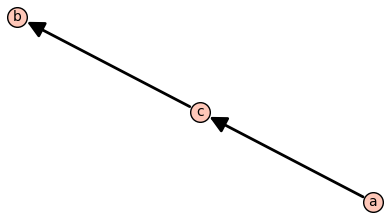

True

Група автоморфізмів графа G2: Permutation Group with generators [('a','b','c')]


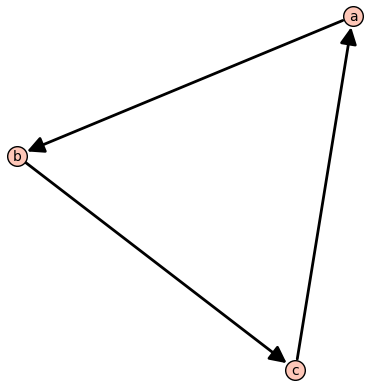

True


In [12]:
A2 = AlternatingGroup(2) 
G1 = DiGraph([('a', 'c'), ('c', 'b')])
print("Група автоморфізмів графа G1:", G1.automorphism_group())
G1.show()
print(G1.automorphism_group().is_isomorphic(A2))

A3 = AlternatingGroup(3) 
G2 = DiGraph([('a', 'b'), ('b', 'c'), ('c', 'a')])
print("\nГрупа автоморфізмів графа G2:", G2.automorphism_group())
G2.show()
print(G2.automorphism_group().is_isomorphic(A3))

## Завдання 5

Побудуйте простий граф, в якого група автоморфізмів тривіальна. 

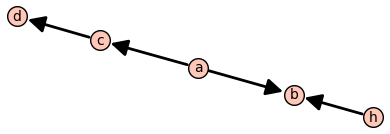


Група автоморфізмів: Permutation Group with generators [()]
Розмір групи автоморфізмів: 1


In [13]:
G = DiGraph([('a', 'c'), ('c', 'd'), ('a', 'b'), ('h', 'b')]);
G.show()
automorphisms = G.automorphism_group()
print("\nГрупа автоморфізмів:", automorphisms)
print("Розмір групи автоморфізмів:", automorphisms.order())

## Завдання 6

1. Побудуйте граф, як показано в коді нижче, і знайдіть його групу автоморфізмів. Розгляньте цю групу і її дію на граф. Покажіть орбіти цієї групової дії та зробіть висновки. 
2. Знайдіть стабілізатор довільної вершини та розгляньте його як групу з дією на весь граф. Знайдіть орбіти цієї нової групової дії. Зробіть висновки в термінах графа.

_Підказка_: намалюйте граф як планарний за допомогою `.plot(layout='planar')` для кращої наочності.

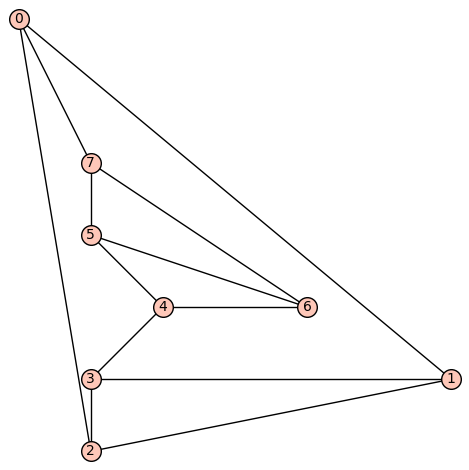

In [14]:
G = graphs.CycleGraph(8)
G.add_edges([(0, 2), (1, 3), (4, 6), (5, 7)])
G.plot(layout='planar')

In [15]:
Aut = G.automorphism_group()
Aut

Permutation Group with generators [(5,6), (1,2), (0,3)(4,7), (0,4)(1,5)(2,6)(3,7)]

In [16]:
orbits = Aut.orbits()
print("Орбіти групової дії на вершинах графа:")
for orbit in orbits:
    print(orbit)
print("\nРозмір групи автоморфізмів:", Aut.order())
print("\nСтруктура автоморфізмів:", Aut.structure_description())
degrees = [G.degree(v) for v in G.vertices()]
print("\nСтепені вершин:", degrees)

Орбіти групової дії на вершинах графа:
(0, 3, 4, 7)
(1, 2, 5, 6)

Розмір групи автоморфізмів: 16

Структура автоморфізмів: C2 x D4

Степені вершин: [3, 3, 3, 3, 3, 3, 3, 3]


In [17]:
# Група автоморфізмів має структуру 'C2 x D4'. Відповідно містить як деяку симетрію між двома вершинами, 
# так і повороти і відзеркалення
# За допомогою орбіт видно, що деякі вершини є симетричними щодо певних операцій групи
# Граф є 3-регулярним

In [18]:
# 2 пункт
vertex = 5
stab = Aut.stabilizer(vertex)
print("Стабілізатор вершини '5':\n", stab)
orbits_vertex = stab.orbits()
print("\nОрбіти стабілізатора вершини '5':\n", orbits_vertex)
print("\nПорядок стабілізатора: ", stab.order())
stab.structure_description()

Стабілізатор вершини '5':
 Subgroup generated by [(0,3)(4,7), (1,2)] of (Permutation Group with generators [(5,6), (1,2), (0,3)(4,7), (0,4)(1,5)(2,6)(3,7)])

Орбіти стабілізатора вершини '5':
 ((0, 3), (1, 2), (4, 7), (5,), (6,))

Порядок стабілізатора:  4


'C2 x C2'

In [19]:
# Структура стабілізатора C2×C2 вказує на те, що стабілізатор діє як незалежні перестановки на пари вершин, що відповідають орбіті